# Q1 A. Classification of Fruits

You are provided with a dataset of fruits. Each fruit is characterized by two features: weight (in grams) and
sweetness level (on a scale of 1 to 10). You want to classify a new fruit as either an "Apple" or an "Orange"
based on these features using the KNN algorithm.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [31]:
data = {
    'weight': [180, 200, 150, 170, 160, 140],
    'sweetness': [7, 6, 4, 5, 6, 3],
    'label': ['apple', 'apple','orange', 'orange', 'apple', 'orange']
}

df = pd.DataFrame(data)

label_map = {'apple': 0, 'orange': 1}
df['label_num'] = df['label'].map(label_map)

df

,weight,sweetness,label,label_num
0,180,7,apple,0
1,200,6,apple,0
2,150,4,orange,1
3,170,5,orange,1
4,160,6,apple,0
5,140,3,orange,1


In [37]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p):
    return np.power(np.sum(np.abs(point1 - point2) ** p), 1/p)

In [38]:
def knn(df, new_point, k=3):
    distances = []
    
    for index, row in df.iterrows():
        point = np.array([row['weight'], row['sweetness']])
        distance = euclidean_distance(point, new_point)
        distances.append((distance, row['label']))
    
    distances.sort(key=lambda x: x[0])
    nearest_labels = [label for _, label in distances[:k]]
    
    most_common = Counter(nearest_labels).most_common(1)
    return most_common[0][0]

In [40]:
new_fruit = np.array([165, 5.5])

euclidean_distances = [euclidean_distance(np.array([row['weight'], row['sweetness']]), new_fruit) for index, row in df.iterrows()]
manhattan_distances = [manhattan_distance(np.array([row['weight'], row['sweetness']]), new_fruit) for index, row in df.iterrows()]
minkowski_distances = [minkowski_distance(np.array([row['weight'], row['sweetness']]), new_fruit, 3) for index, row in df.iterrows()]

predicted_label = knn(df, new_fruit, k=3)
print(f"The predicted label for the new fruit is: {predicted_label}")

The predicted label for the new fruit is: apple


In [35]:
for k in [1, 3, 5]:
    predicted_label = knn(df, new_fruit, k=k)
    print(f"Predicted label with k={k}: {predicted_label}")


Predicted label with k=1: orange
Predicted label with k=3: apple
Predicted label with k=5: orange


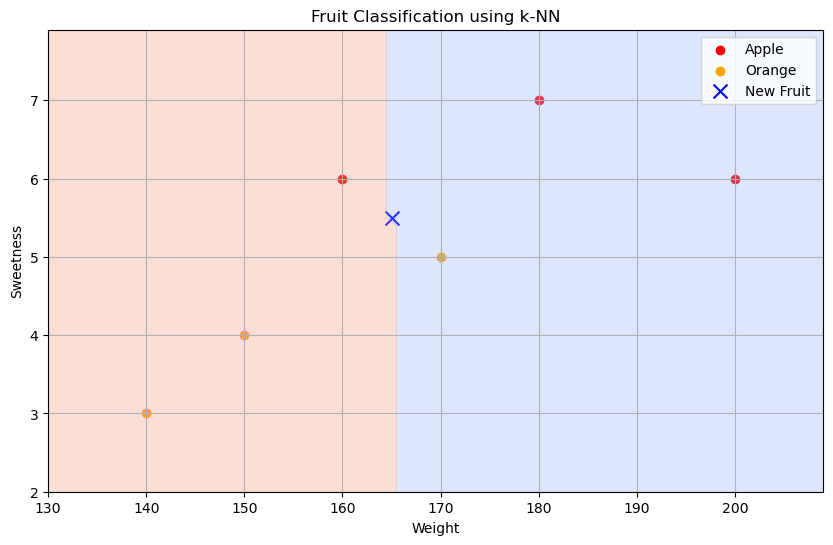

In [39]:
plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    if row['label'] == 'apple':
        plt.scatter(row['weight'], row['sweetness'], color='red', label='Apple' if 'Apple' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(row['weight'], row['sweetness'], color='orange', label='Orange' if 'Orange' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit')

plt.xlabel('Weight')
plt.ylabel('Sweetness')
plt.title('Fruit Classification using k-NN')
plt.legend()
plt.grid()

x_min, x_max = df['weight'].min() - 10, df['weight'].max() + 10
y_min, y_max = df['sweetness'].min() - 1, df['sweetness'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))
Z = np.array([knn(df, np.array([x, y]), k=3) for x, y in zip(np.ravel(xx), np.ravel(yy))])
Z = np.array([label_map[label] for label in Z]).reshape(xx.shape) 

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=[-0.5, 0.5, 1.5])
plt.show()

# Q2 B. Classification of Fruits

Implement the Python code for Q-1. A using the scikit-learn library. Plot the given samples, using red for
"Apple" and orange for "Orange." Also, plot the decision boundary. Calculate the distances using Euclidean,
Manhattan, and Minkowski metrics, and compare the results.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['weight', 'sweetness']]
y = df['label']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

new_fruit = np.array([[165, 5.5]])
predicted_label = knn.predict(new_fruit)
print(f"Predicted fruit: {predicted_label[0]}")

Predicted fruit: orange


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
